# **<p style="font-size:200%;text-align:center;color:#FF9900">Amazon Sales Dataset EDA</p>**
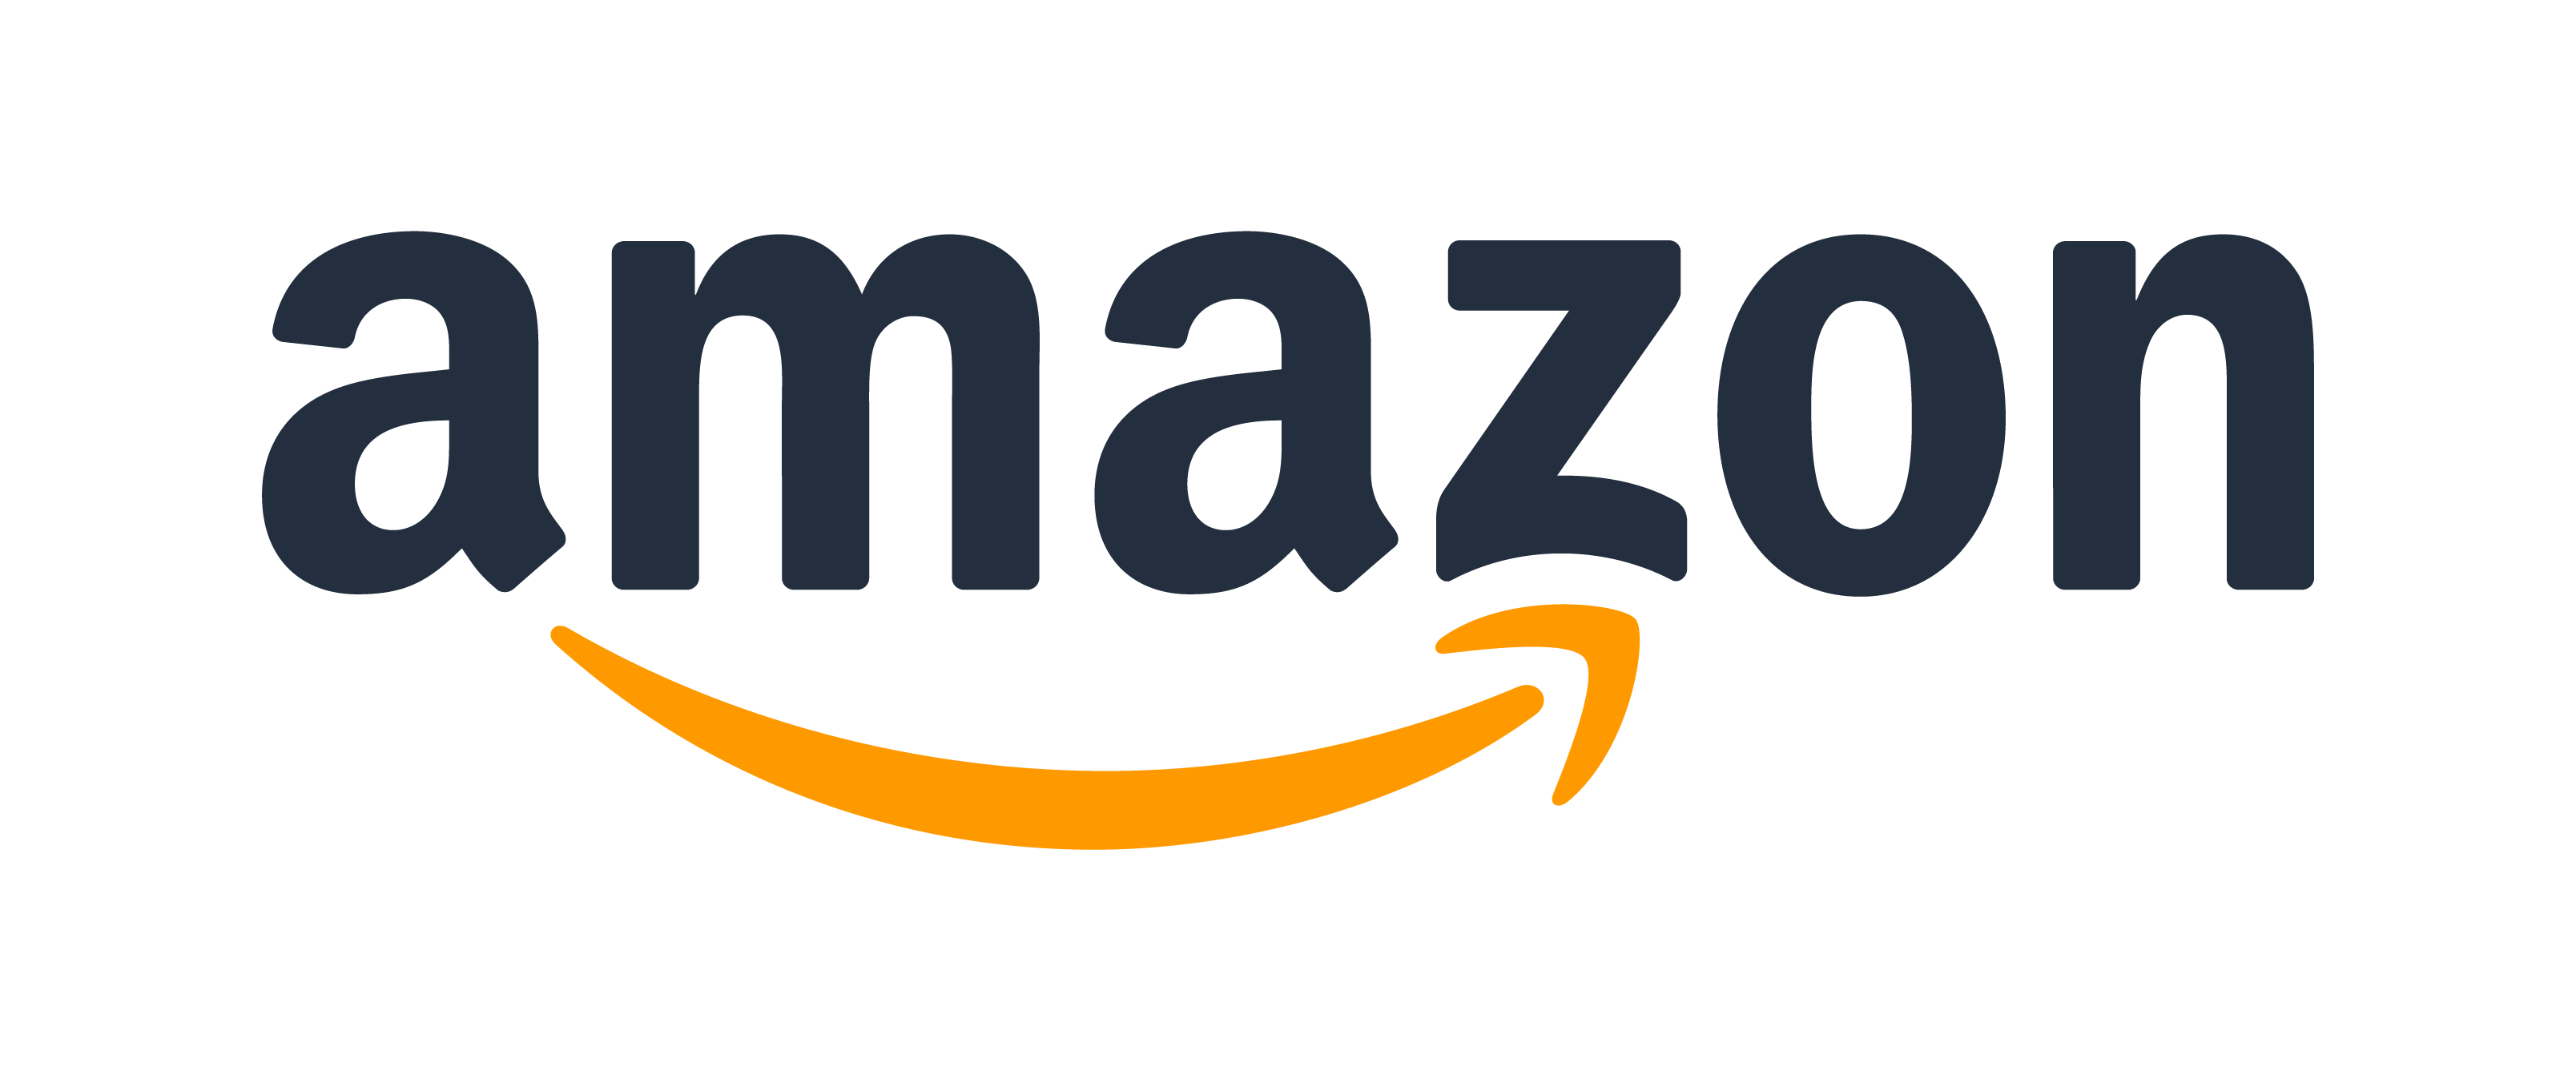

<p style="font-size:20px;">This project studies the indian Amazon Sales Dataset to develop EDA practice while better understanding the data, such as price distribution and most famous products</p>

Currency conversion as of the date of the creation of this project: 1INR = 0,012USD

## <p style="font-size:200%;text-align:center;color:#FF9900">Imports</p>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Data Visualization
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator # WordCloud generator

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

df = pd.read_csv("../input/amazon-sales-dataset/amazon.csv")

/kaggle/input/amazon-sales-dataset/amazon.csv


## <p style="font-size:200%;text-align:center;color:#FF9900">First investigations</p>

In [2]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [4]:
# Cleaning and changing type of price and percentage columns from string to float64

# Prices with "," as thousands separator
df['discounted_price'] = df['discounted_price'].str.replace("₹",'')
df['discounted_price'] = df['discounted_price'].str.replace(",",'')
df['discounted_price'] = df['discounted_price'].astype('float64')

df['actual_price'] = df['actual_price'].str.replace("₹",'')
df['actual_price'] = df['actual_price'].str.replace(",",'')
df['actual_price'] = df['actual_price'].astype('float64')

# Percentage from "PP%"" to PP/100 value
df['discount_percentage'] = df['discount_percentage'].str.replace('%','').astype('float64')
df['discount_percentage'] = df['discount_percentage'] / 100

# Rating Counts with "," as thousand separator
df['rating_count'] = df['rating_count'].str.replace(",",'').astype('float64')

## <p style="font-size:200%;text-align:center;color:#FF9900">Rating column</p>
<p style="font-size:20px;">When changing the Rating column type from string to float, I encountered a few products with a strange type of rating</p>

In [5]:
df['rating'].unique()

array(['4.2', '4.0', '3.9', '4.1', '4.3', '4.4', '4.5', '3.7', '3.3',
       '3.6', '3.4', '3.8', '3.5', '4.6', '3.2', '5.0', '4.7', '3.0',
       '2.8', '4', '3.1', '4.8', '2.3', '|', '2', '3', '2.6', '2.9'],
      dtype=object)

In [6]:
# One product has the rating "|", so I searched amazon.in for its actual rating, wich was 3.9

# Update rating of this product
df.loc[df.product_id == "B08L12N5H1", 'rating'] = "3.9"

In [7]:
# Changing type of rating column to float
df['rating'] = df['rating'].astype('float64')

## <p style="font-size:200%;text-align:center;color:#FF9900">Missing values</p>

In [8]:
# There are two products with null values in the rating_count column:
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [9]:
df[df.rating_count.isnull()]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
282,B0B94JPY2N,Amazon Brand - Solimo 65W Fast Charging Braide...,Computers&Accessories|Accessories&Peripherals|...,199.0,999.0,0.80,3.0,NaN,USB C to C Cable: This cable has type C connec...,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,Pranav,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Amazon-Brand-Charging-Su...
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,249.0,999.0,0.75,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...


In [10]:
# Since I couldn't find these products on amazon.in, filled them with the median rating_count
df.fillna(value=df['rating_count'].median().round(1), inplace=True)

## <p style="font-size:200%;text-align:center;color:#FF9900">Price Distribution</p>

## <p style="font-size:150%;color:#FF9900">Actual Price</p>

In [11]:
fig = px.histogram(df.actual_price, x="actual_price", nbins=20, title="Price Distribution",color_discrete_sequence=["#232F3E"])
fig.update_layout(bargap=0.1)
fig.show()

In [12]:
below_5000 = len(df[df['actual_price'] <= 5000])
df_len = len(df)

print("%.2f%% of the products are sold below 5000 indian rupees (%.2f USD)" %(100*below_5000/df_len, 5000*0.012))

78.09% of the products are sold below 5000 indian rupees (60.00 USD)


In [13]:
low_price = df[df['actual_price'] <= 5000]
fig = px.histogram(low_price, x="actual_price", title="Below 5000INR price distribution",color_discrete_sequence=["#232F3E"])
fig.update_layout(bargap=0.1)
fig.show()

In [14]:
# The most expensive product is a Smart Television
df[df['actual_price'] == df['actual_price'].max()]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
249,B09WN3SRC7,Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...,"Electronics|HomeTheater,TV&Video|Televisions|S...",77990.0,139900.0,0.44,4.7,5935.0,Resolution: 4K Ultra HD (3840 x 2160) | Refres...,"AF6Z2OYIXRPZJHVYN2MFKKYHPHFQ,AH5SAORYVUN5MGIBL...","David P.,Dr. ATUL THAKUR,Shriniwas Patil,Tahir...","R16HCZ0W1TRSMM,R12J7UKQ0FX3O9,R8729SR7LQFUU,R1...",Product installation was excellent but delive...,The delivery people were not careful with the ...,https://m.media-amazon.com/images/I/51uVckL1jR...,https://www.amazon.in/Sony-Bravia-inches-Googl...


In [15]:
# Actual Price has 5444 as mean Price of all 1465 products
df['actual_price'].describe()

count      1465.000000
mean       5444.990635
std       10874.826864
min          39.000000
25%         800.000000
50%        1650.000000
75%        4295.000000
max      139900.000000
Name: actual_price, dtype: float64

## <p style="font-size:150%;color:#FF9900">Discounted Price</p>

In [16]:
fig = px.histogram(df.discounted_price, x="discounted_price", title="Discounted Price Distribution",color_discrete_sequence=["#232F3E"])
fig.update_layout(bargap=0.1)
fig.show()

In [17]:
# Most the discounted prices are below 3500
below_3500 = df[df['discounted_price'] <= 3500]
fig = px.histogram(below_3500.discounted_price, x="discounted_price", title="Discounted Price Below 3500 Distribution",color_discrete_sequence=["#232F3E"])
fig.update_layout(bargap=0.1)
fig.show()

## <p style="font-size:150%;color:#FF9900">Overlayed Prices</p>

In [18]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=df.actual_price, name="Actual Price", marker_color="#232F3E"))
fig.add_trace(go.Histogram(x=df.discounted_price, name="Discounted Price", marker_color="#FF9900"))

# Overlay both histograms
fig.update_layout(barmode='overlay', title="Actual Price x Discounted Price", xaxis_title="Price", yaxis_title="Number of Products")
# Reduce opacity to see both histograms
fig.update_traces(
    opacity=0.75, 
    xbins=dict( 
        start=0.0,
        end=20000.0),
    hovertemplate="Price Range: %{x} | Count: %{y}"
        )
fig.show()

## <p style="font-size:150%;color:#FF9900">Discount Percentage</p>

In [19]:
fig = px.histogram(df.discount_percentage, x="discount_percentage", title="Discount Percentage Distribution", color_discrete_sequence=["#232F3E"])
fig.update_layout(bargap=0.1)
fig.show()

The most applied discount percentages are between 40-70%

## <p style="font-size:200%;text-align:center;color:#FF9900">Rating</p>

In [20]:
fig = px.histogram(df.rating, x="rating", title="Rating Distribution",color_discrete_sequence=["#232F3E"])
fig.update_layout(bargap=0.1)
fig.show()

In [21]:
avg_rated_percentage = df[df['rating'].between(3.8, 4.5)].count().rating / df.count().rating
print("%.2f%% of the values are rated between 3.8 and 4.5" %(avg_rated_percentage*100))

88.12% of the values are rated between 3.8 and 4.5


## <p style="font-size:200%;text-align:center;color:#FF9900">Price x Rating</p>

In [22]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.actual_price, y=df.rating, mode="markers", name="Actual Price", marker_color="#232F3E"))
fig.add_trace(go.Scatter(x=df.discounted_price,  y=df.rating, mode="markers", name="Discounted Price", marker_color="#FF9900"))

fig.update_layout(title="Actual and Discounted Prices x Rating", xaxis_title="Price", yaxis_title="Rating")

fig.show()

As shown above, Products priced above 20k INR are all rated above 3.7 stars

## <p style="font-size:200%;text-align:center;color:#FF9900">Categories</p>

In [23]:
categories = df['category'].copy()

for i in range(len(categories)):
    categories[i] = categories[i].split('|')

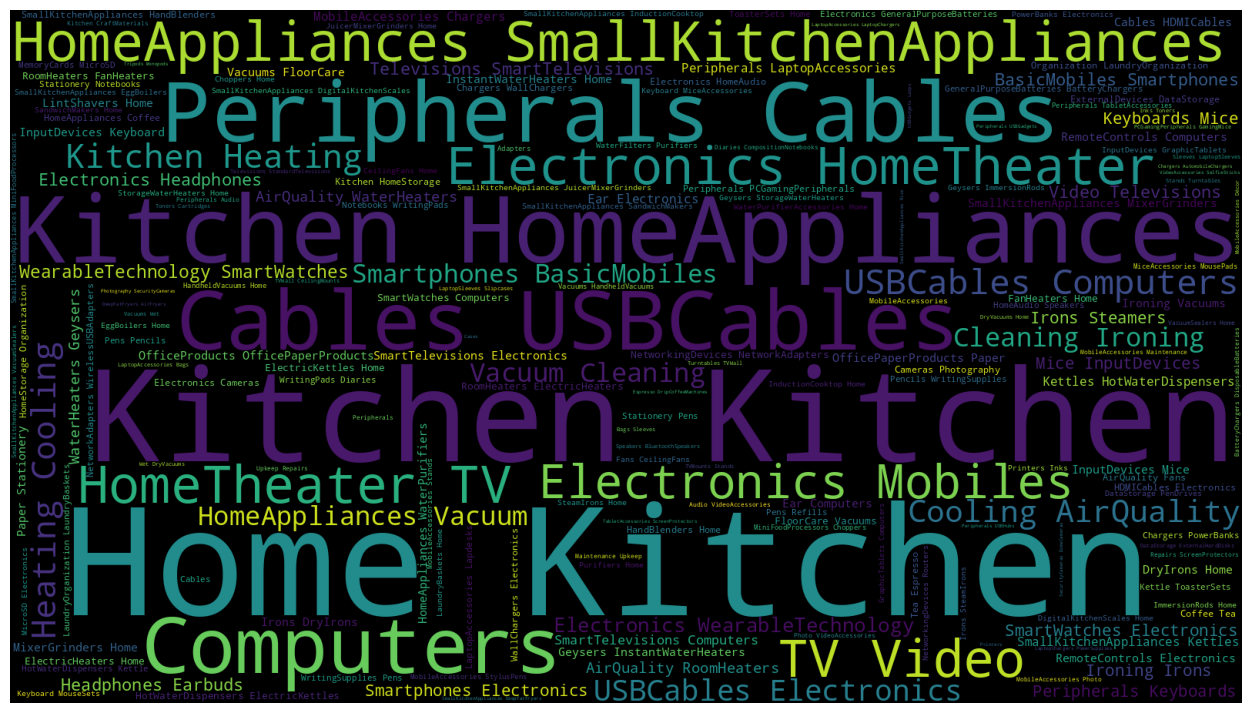

In [24]:
summary = df['category'].copy()

all_summary = " ".join(s for s in summary)

stopwords = set(STOPWORDS)
stopwords.update(["Accessories", "&"])
# Create Wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1600, height=900).generate(all_summary)

fig, ax = plt.subplots(figsize=(16,9))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud);

As shown in the WordCloud, the Kitchen products, such as Electronics/Computers and their Accessories such as cables are the most famous products in this Dataset